<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#библиотеки" data-toc-modified-id="библиотеки-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>библиотеки</a></span></li><li><span><a href="#данные" data-toc-modified-id="данные-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>данные</a></span></li><li><span><a href="#обучение" data-toc-modified-id="обучение-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>обучение</a></span></li></ul></div>

## библиотеки

In [1]:
# !pip install torch torchvision pandas

import pandas as pd
import numpy as np
import os
import torch
import json
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import torch.nn as nn
from torchvision.models import resnet50, ResNet50_Weights
from PIL import Image
from torchvision import transforms
from torch.utils.data import Dataset, DataLoader
from sklearn.model_selection import train_test_split

from PIL import Image, ImageOps, ImageEnhance


In [2]:
# Переменные
num_epochs=70
foto_directory = r"E:\gnat\locate_6points" # Путь к директории с фотографиями и CSV-файлом
threshold_value = 185  # Пороговое значение для выделения черных частей
random_state = 12

## данные

In [3]:
# # ИНВЕРТИРОВАНИЕ+КОНТРАСТ

# # Перебор всех файлов в директории
# for filename in os.listdir(foto_directory):
#     if filename.lower().endswith(('.png', '.jpg', '.jpeg')):  # Проверка, что файл является изображением
#         img_path = os.path.join(foto_directory, filename)
#         with Image.open(img_path) as img:
# #             # Проверка, нужно ли обрезать изображение
# #             if img.size[0] > target_width or img.size[1] > target_height:
# #                 # Обрезка по горизонтали
# #                 total_crop_width = img.size[0] - target_width
# #                 left_crop = total_crop_width * 0.80
# #                 right_crop = total_crop_width * 0.20
# #                 left = left_crop
# #                 right = img.size[0] - right_crop

# #                 # Обрезка по вертикали
# #                 total_crop_height = img.size[1] - target_height
# #                 top_crop = total_crop_height * 0.5
# #                 bottom_crop = total_crop_height * 0.5
# #                 top = top_crop
# #                 bottom = img.size[1] - bottom_crop

# #                 # Обрезка изображения
# #                 img = img.crop((left, top, right, bottom))

                           
          
#             # ОБРАБОТАТЬ
#             img = ImageOps.invert(img) # Инвертирование цветов
#             enhancer = ImageEnhance.Contrast(img) # Увеличение контрастности 
#             img = enhancer.enhance(2.0)  # Увеличение контрастности 
# #             img = img.convert('L').point(lambda x: 0 if x < threshold_value else 255, '1') # оставим черные части, учитывая порог
                      
# #             # 3 Изменение размера до new_width x new_height
# #             img = img.resize((new_width, new_height))
            
#             # Сохранение обработанного изображения, заменяя оригинал
#             img.save(img_path)

In [4]:
# фывфыв

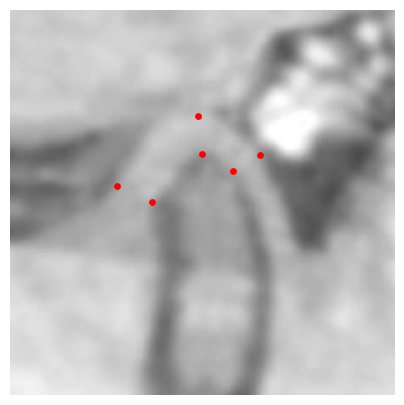

In [5]:
# Загрузим, выведем фото с нашей разметкой

# Чтение CSV файла
csv_file = os.path.join(foto_directory, "locate_6points.csv")  # Замените на имя вашего CSV файла
df = pd.read_csv(csv_file)

# Извлечение координат из JSON и создание столбцов x и y
df['x'] = df['region_shape_attributes'].apply(lambda s: json.loads(s).get('cx'))
df['y'] = df['region_shape_attributes'].apply(lambda s: json.loads(s).get('cy'))

# Группировка точек по имени файла
grouped = df.groupby('filename')

# Функция для отображения одного изображения с точками
def plot_image_with_points(filename, points_df):
    # Загрузка изображения
    img_path = os.path.join(foto_directory, filename)
    img = mpimg.imread(img_path)

    # Установка размера отображаемого изображения
    plt.figure(figsize=(5, 5))  # Увеличиваем размер изображения

    # Отображение изображения
    plt.imshow(img)
    plt.axis('off')  # Выключить оси

    # Нанесение всех точек
    for index, row in points_df.iterrows():
        plt.scatter(row['x'], row['y'], c='red', s=15)  # s - размер точки

    plt.show()

# Выбор одного изображения и его точек для отображения
sample_filename = list(grouped.groups.keys())[0]  # Преобразование в список и выбор первого имени файла
points_df = grouped.get_group(sample_filename)

# Отображение изображения с точками
plot_image_with_points(sample_filename, points_df)

In [6]:
df.head(12)

,filename,file_size,file_attributes,region_count,region_id,region_shape_attributes,region_attributes,x,y
0,К8Пс 2.jpg,6569,{},6,0,"{""name"":""point"",""cx"":97,""cy"":109}",{},97,109
1,К8Пс 2.jpg,6569,{},6,1,"{""name"":""point"",""cx"":82,""cy"":104}",{},82,104
2,К8Пс 2.jpg,6569,{},6,2,"{""name"":""point"",""cx"":116,""cy"":96}",{},116,96
3,К8Пс 2.jpg,6569,{},6,3,"{""name"":""point"",""cx"":116,""cy"":66}",{},116,66
4,К8Пс 2.jpg,6569,{},6,4,"{""name"":""point"",""cx"":128,""cy"":115}",{},128,115
5,К8Пс 2.jpg,6569,{},6,5,"{""name"":""point"",""cx"":153,""cy"":97}",{},153,97
6,К13Лс 2.jpg,3996,{},6,0,"{""name"":""point"",""cx"":87,""cy"":103}",{},87,103
7,К13Лс 2.jpg,3996,{},6,1,"{""name"":""point"",""cx"":72,""cy"":91}",{},72,91
8,К13Лс 2.jpg,3996,{},6,2,"{""name"":""point"",""cx"":106,""cy"":86}",{},106,86
9,К13Лс 2.jpg,3996,{},6,3,"{""name"":""point"",""cx"":104,""cy"":64}",{},104,64


## обучение

In [7]:
# Определение уникальных фотографий и разделение на выборки
unique_photos = df['filename'].unique()
test_size_ratio = 0.10
test_photo_count = int(len(unique_photos) * test_size_ratio)
train_photos, test_photos = train_test_split(unique_photos, test_size=test_photo_count, random_state=random_state)
train_df = df[df['filename'].isin(train_photos)]
test_df = df[df['filename'].isin(test_photos)]

# Предобработка данных
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
])

In [8]:
test_df

,filename,file_size,file_attributes,region_count,region_id,region_shape_attributes,region_attributes,x,y
72,К106Лс 2.jpg,4094,{},6,0,"{""name"":""point"",""cx"":79,""cy"":106}",{},79,106
73,К106Лс 2.jpg,4094,{},6,1,"{""name"":""point"",""cx"":54,""cy"":96}",{},54,96
74,К106Лс 2.jpg,4094,{},6,2,"{""name"":""point"",""cx"":99,""cy"":86}",{},99,86
75,К106Лс 2.jpg,4094,{},6,3,"{""name"":""point"",""cx"":97,""cy"":62}",{},97,62
76,К106Лс 2.jpg,4094,{},6,4,"{""name"":""point"",""cx"":129,""cy"":96}",{},129,96
77,К106Лс 2.jpg,4094,{},6,5,"{""name"":""point"",""cx"":142,""cy"":78}",{},142,78


In [9]:
# %%time

# # Загрузка данных
# class PointsDataset(Dataset):
#     def __init__(self, dataframe, image_dir, transform=None):
#         self.dataframe = dataframe
#         self.image_dir = image_dir
#         self.transform = transform

#     def __len__(self):
#         return len(self.dataframe['filename'].unique())

#     def __getitem__(self, idx):
#         filename = self.dataframe['filename'].unique()[idx]
#         image = Image.open(os.path.join(self.image_dir, filename)).convert('RGB')
#         points = self.dataframe[self.dataframe['filename'] == filename][['x', 'y']].values.flatten()
#         if self.transform:
#             image = self.transform(image)
#         return image, torch.tensor(points, dtype=torch.float32)

# # Создание экземпляров датасета
# train_dataset = PointsDataset(train_df, foto_directory, transform)
# test_dataset = PointsDataset(test_df, foto_directory, transform)
# train_loader = DataLoader(train_dataset, batch_size=4, shuffle=True)
# test_loader = DataLoader(test_dataset, batch_size=4, shuffle=False)

# # Создание модели
# class RegressionModel(nn.Module):
#     def __init__(self):
#         super(RegressionModel, self).__init__()
#         # Использование ResNet50 как основы
#         self.base_model = resnet50(pretrained=True)
#         # Замена последнего слоя на новый для регрессии координат
#         self.base_model.fc = nn.Linear(self.base_model.fc.in_features, 12)
#     def forward(self, x):
#         return self.base_model(x)

# # Инициализация
# model = RegressionModel()

# # Определение функции потерь и оптимизатора
# criterion = nn.MSELoss()
# optimizer = torch.optim.Adam(model.parameters(), lr=0.001)        

# # Функция обучения
# def train_model(model, train_loader, criterion, optimizer, num_epochs=1):
#     model.train()
#     best_loss = float('inf')
#     best_model_wts = None
#     epoch_losses = []  # Список для сохранения потерь каждой эпохи

#     for epoch in range(num_epochs):
#         running_loss = 0.0
#         for images, labels in train_loader:
#             optimizer.zero_grad()
#             outputs = model(images)
#             loss = criterion(outputs, labels)
#             loss.backward()
#             optimizer.step()
#             running_loss += loss.item()

#         epoch_loss = running_loss / len(train_loader)
#         epoch_losses.append(epoch_loss)  # Добавление потерь текущей эпохи в список

#         # Обновление информации о текущей эпохе
#         print(f'\rEpoch [{epoch+1}/{num_epochs}], Loss: {epoch_loss:.4f}', end='') # print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {epoch_loss:.4f}')

#         # Сохранение лучшей модели
#         if epoch_loss < best_loss:
#             best_loss = epoch_loss
#             best_model_wts = model.state_dict()

#     # Восстановление лучшей модели
#     model.load_state_dict(best_model_wts)

#     # Построение графика потерь
#     plt.plot(epoch_losses, label='Training Loss')
#     plt.xlabel('Epochs')
#     plt.ylabel('Loss')
#     plt.title('Training Loss per Epoch')
#     plt.legend()
#     plt.show()

#     return model

# trained_model = train_model(model, train_loader, criterion, optimizer, num_epochs=num_epochs)

# # Тестирование
# def test_model(model, test_loader, image_dir):
#     model.eval()
#     with torch.no_grad():
#         for images, labels in test_loader:
#             outputs = model(images).cpu().numpy()  # Получение прогнозов и перевод в numpy массив
#             images = images.cpu().numpy()

#             # Преобразование изображений из тензоров обратно в PIL изображения для отображения
#             images = images.transpose((0, 2, 3, 1))  # Перестановка осей из (N,C,H,W) в (N,H,W,C)
#             images = images * np.array([0.229, 0.224, 0.225]) + np.array([0.485, 0.456, 0.406])  # Денормализация
#             images = np.clip(images, 0, 1)  # Ограничение значений для корректного отображения

#             # Отображение изображений и нанесение точек
#             for i in range(len(images)):
#                 plt.imshow(images[i]) 
#                 plt.scatter(outputs[i][::2], outputs[i][1::2], s=50, marker='.', c=(1, 1, 0))  #  c='y'
#                 plt.axis('off')
#                 plt.show()

# # Тест и вывод изображений с предсказанными точками
# test_model(trained_model, test_loader, foto_directory)

D:\installed\anaconda3\envs\notebook\Lib\site-packages\torchvision\models\_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
D:\installed\anaconda3\envs\notebook\Lib\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet50_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet50_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


Epoch [70/70], Loss: 33.249472

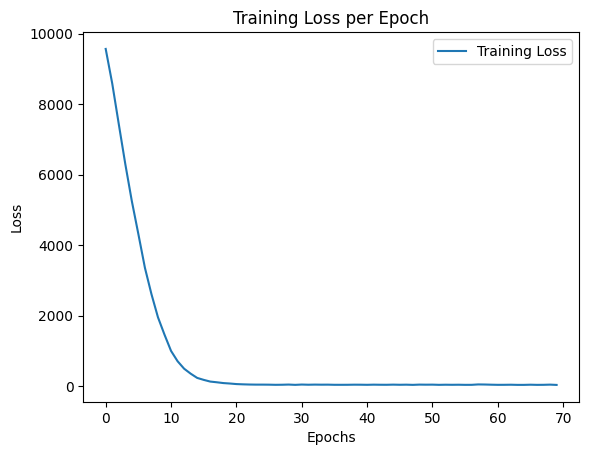

<timed exec>:111: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


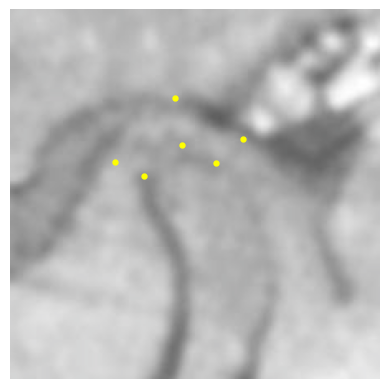

CPU times: total: 21min 51s
Wall time: 5min 58s


In [10]:
%%time
import os
import torch
import torch.nn as nn
import numpy as np
import matplotlib.pyplot as plt
from torchvision.models import resnet50
from PIL import Image
from torch.utils.data import Dataset, DataLoader

# Функция для сохранения модели
def save_model(model, filename="model_locate_6points.pth"):
    torch.save(model.state_dict(), filename)

# Функция для загрузки модели
def load_model(model, filename="model_locate_6points.pth"):
    model.load_state_dict(torch.load(filename))
    return model

# Класс датасета
class PointsDataset(Dataset):
    def __init__(self, dataframe, image_dir, transform=None):
        self.dataframe = dataframe
        self.image_dir = image_dir
        self.transform = transform

    def __len__(self):
        return len(self.dataframe['filename'].unique())

    def __getitem__(self, idx):
        filename = self.dataframe['filename'].unique()[idx]
        image = Image.open(os.path.join(self.image_dir, filename)).convert('RGB')
        points = self.dataframe[self.dataframe['filename'] == filename][['x', 'y']].values.flatten()
        if self.transform:
            image = self.transform(image)
        return image, torch.tensor(points, dtype=torch.float32)

# Создание экземпляров датасета
train_dataset = PointsDataset(train_df, foto_directory, transform)
test_dataset = PointsDataset(test_df, foto_directory, transform)

# Создание загрузчиков данных
train_loader = DataLoader(train_dataset, batch_size=4, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=4, shuffle=False)

# Определение модели
class RegressionModel(nn.Module):
    def __init__(self):
        super(RegressionModel, self).__init__()
        self.base_model = resnet50(pretrained=True)
        self.base_model.fc = nn.Linear(self.base_model.fc.in_features, 12)

    def forward(self, x):
        return self.base_model(x)

# Инициализация модели, функции потерь и оптимизатора
model = RegressionModel()
criterion = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)        

# Функция обучения
def train_model(model, train_loader, criterion, optimizer, num_epochs=1):
    model.train()
    best_loss = float('inf')
    epoch_losses = []

    for epoch in range(num_epochs):
        running_loss = 0.0
        for images, labels in train_loader:
            optimizer.zero_grad()
            outputs = model(images)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()
            running_loss += loss.item()

        epoch_loss = running_loss / len(train_loader)
        epoch_losses.append(epoch_loss)

        print(f'\rEpoch [{epoch+1}/{num_epochs}], Loss: {epoch_loss:.4f}', end='')

        if epoch_loss < best_loss:
            best_loss = epoch_loss
            save_model(model, "model_locate_6points.pth")

    # Построение графика потерь
    plt.plot(epoch_losses, label='Training Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.title('Training Loss per Epoch')
    plt.legend()
    plt.show()

    return model

# Обучение модели
trained_model = train_model(model, train_loader, criterion, optimizer, num_epochs=num_epochs)

# Функция тестирования
def test_model(model, test_loader):
    model.eval()
    with torch.no_grad():
        for images, labels in test_loader:
            outputs = model(images).cpu().numpy()
            images = images.cpu().numpy()
            images = images.transpose((0, 2, 3, 1))
            images = images * np.array([0.229, 0.224, 0.225]) + np.array([0.485, 0.456, 0.406])
            images = np.clip(images, 0, 1)

            for i in range(len(images)):
                plt.imshow(images[i])
                plt.scatter(outputs[i][::2], outputs[i][1::2], s=50, marker='.', c=(1, 1, 0))
                plt.axis('off')
                plt.show()

# Загрузка сохраненной модели для тестирования
trained_model = load_model(trained_model, "model_locate_6points.pth")

# Тестирование модели
test_model(trained_model, test_loader)

In [11]:
# Предсказанные координаты в пикселях на оригинальном изображении (например 224x224) в пикселях
def test_model(model, test_loader):
    model.eval()
    with torch.no_grad():
        for images, labels in test_loader:
            outputs = model(images)
            print(outputs)

test_model(trained_model, test_loader)

tensor([[ 80.8307, 100.7498,  63.1818,  91.7142, 103.8488,  81.6742,  99.4611,
          53.2438, 124.4755,  92.4752, 140.7782,  78.1576]])


In [12]:
def test_model(model, test_loader):
    model.eval()
    predicted_coordinates = []  # Список для хранения предсказанных координат
    with torch.no_grad():
        for images, labels in test_loader:
            outputs = model(images)
            # Округление координат до целых чисел и преобразование в список
            batch_coordinates = outputs.round().int().tolist()
            predicted_coordinates.extend(batch_coordinates)
    
    return predicted_coordinates

predicted_coords = test_model(trained_model, test_loader)
print(predicted_coords)

[[81, 101, 63, 92, 104, 82, 99, 53, 124, 92, 141, 78]]


In [13]:
# # Переданный список координат
coords_list = predicted_coords

# Преобразование списка в словарь
coords_dict = {f"point_{i+1}": (coords_list[0][2*i], coords_list[0][2*i+1]) for i in range(len(coords_list[0]) // 2)}
coords_dict

{'point_1': (81, 101),
 'point_2': (63, 92),
 'point_3': (104, 82),
 'point_4': (99, 53),
 'point_5': (124, 92),
 'point_6': (141, 78)}

In [14]:
import math

# ЭВКЛИДОВО расстояние между 2 точками
# Функция для расчета евклидова расстояния между двумя точками
def euclidean_distance(point1, point2):
    return math.sqrt((point1[0] - point2[0])**2 + (point1[1] - point2[1])**2)

# РАССТОЯНИЕ от точки перпендикулярно к прямой
# Функция для расчета площади треугольника по трем точкам
def area_of_triangle(p1, p2, p3):
    return abs((p1[0]*(p2[1]-p3[1]) + p2[0]*(p3[1]-p1[1]) + p3[0]*(p1[1]-p2[1])) / 2.0)
# Функция для расчета длины перпендикуляра от точки к прямой, образованной двумя другими точками
def perpendicular_distance(point, line_point1, line_point2):
    # Площадь треугольника, образованного тремя точками
    area = area_of_triangle(point, line_point1, line_point2)
    # Расстояние между двумя точками линии
    length = euclidean_distance(line_point1, line_point2)
    # Длина перпендикуляра (высота треугольника)
    return (2.0 * area) / length


# Расчет расстояний между заданными парами точек
left =            distance_1_2 = euclidean_distance(coords_dict['point_1'], coords_dict['point_2'])
top =             distance_3_4 = euclidean_distance(coords_dict['point_3'], coords_dict['point_4'])
right =           distance_5_6 = euclidean_distance(coords_dict['point_5'], coords_dict['point_6'])
condyle_width =   distance_1_5 = euclidean_distance(coords_dict['point_1'], coords_dict['point_5']) # ширина мыщелка
art_fossa_width = distance_2_6 = euclidean_distance(coords_dict['point_2'], coords_dict['point_6'])
condyle_height =  perpendicular_length_3_1_5 = perpendicular_distance(coords_dict['point_3'], coords_dict['point_1'], coords_dict['point_5'])
art_fossa_depth = perpendicular_length_4_2_6 = perpendicular_distance(coords_dict['point_4'], coords_dict['point_2'], coords_dict['point_6'])

# Округление значений расстояний до десятых
left = round(left, 1)
top = round(top, 1)
right = round(right, 1)
condyle_width = round(condyle_width, 1)
art_fossa_width = round(art_fossa_width, 1)
condyle_height = round(condyle_height, 1)
art_fossa_depth = round(art_fossa_depth, 1)

left, top, right, condyle_width, art_fossa_width, condyle_height, art_fossa_depth

(20.1, 29.4, 22.0, 43.9, 79.2, 13.9, 32.0)

In [15]:
import pandas as pd

# Define the column names in Russian
columns = [
    "ID", 
    "Проекция", 
    "Сторона", 
    "left, мм", 
    "top, мм", 
    "right, мм", 
    "condyle_width\n(ширина мыщелка)", 
    "condyle_height\n(высота мыщелка)", 
    "art_fossa_width\n(ширина ямки)", 
    "art_fossa_depth\n(глубина ямки)", 
    "Патология"
]

# Create an empty DataFrame with these columns
df = pd.DataFrame(columns=columns)

# Добавление данных в DataFrame
df.loc[0] = ["1", "ПримерПроекции", "Лево", left, top, right, condyle_width, condyle_height, art_fossa_width, art_fossa_depth, "ПримерПатологии"]

# Определение числовых столбцов в DataFrame
numeric_columns = df.select_dtypes(include=['number']).columns
df_2 = df.copy()
# Разделение значений в числовых столбцах на коэф
df_2[numeric_columns] = round(df_2[numeric_columns] / (28.3/2.8), 1)

# Путь к файлу для сохранения DataFrame
path = r"E:\gnat\distance_to_pathology\distance_to_pathology_test_2.xlsx"
# Сохранение DataFrame в файл Excel
df_2.to_excel(path, index=False)

df_2

,ID,Проекция,Сторона,"left, мм","top, мм","right, мм",condyle_width\n(ширина мыщелка),condyle_height\n(высота мыщелка),art_fossa_width\n(ширина ямки),art_fossa_depth\n(глубина ямки),Патология
0,1,ПримерПроекции,Лево,2.0,2.9,2.2,4.3,1.4,7.8,3.2,ПримерПатологии
